# <center> Breast Cancer Wisconsin (Diagnostic) Data Set
# <center>   Visualization + Prediction

In [4]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [20]:
#Loading the Dataset
df = pd.read_csv('data.csv')

In [21]:
# Seeing what the data looks like!
# I pretty much always do this the first time I load the dataset to see what kind of data it is!
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
# Another practice I almost always follow to get an insight on different columns
# We have 32 columns. The id and the Unnamed: 32 column don't seem to be helpful at all!
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [23]:
#So all our data is numerical, except for the diagnosis, which is the target variable as well (We convert it into numerical below!)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
#Dropping the ID and Unnamed: 32 Column
df = df.drop(['id', 'Unnamed: 32'], axis =1 )

In [25]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
#df.dtypes

In [27]:
# Wrote the function below to convert the diagnosis variable to numerical, but found out that Python (sklearn) already has a LabelEncoder method, that is used below:

# # We only have the first column (Diagnosis) as categorical, and we can convert it into numerical:
# # M = Malignant = 1
# # Benign = 0
# def diag_to_num(diagnosis):
#     for i in diagnosis:
#         if i =='M':
#             return 1
#         else:
#             return 0

# df['diagnosis'] = df['diagnosis'].apply(diag_to_num)

In [28]:
lab_enc = LabelEncoder()
df.iloc[: ,0] = lab_enc.fit_transform(df.iloc[:,0]).astype('float64')

In [29]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
# We now get the target variable in a seperate dataframe  
x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
x.tail(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [61]:
x.shape
# There are still 30 variables that we can use for our predictions. 
# Let's see if there're any highly correlated one's that can be removed. 


(569, 30)

Benign Cases:  357
Malignant Cases:  212


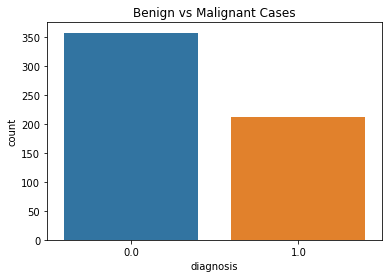

In [62]:
#Now, we have cleaned the data, and can learn about it before making predictions:
v1 = sns.countplot(x = y, label = 'Count')
plt.title("Benign vs Malignant Cases")

b, m = y.value_counts()
print("Benign Cases: ", b)
print("Malignant Cases: ", m)

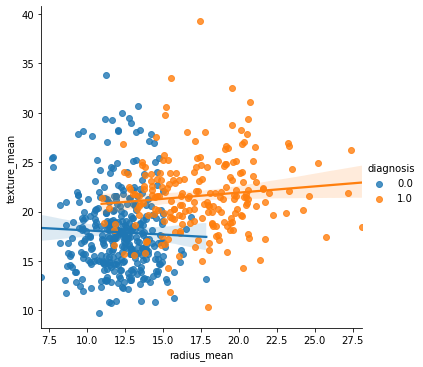

In [63]:
# Using two features to see how the data looks lifke
sns.lmplot( x= 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df);

In [64]:
#x.describe().T

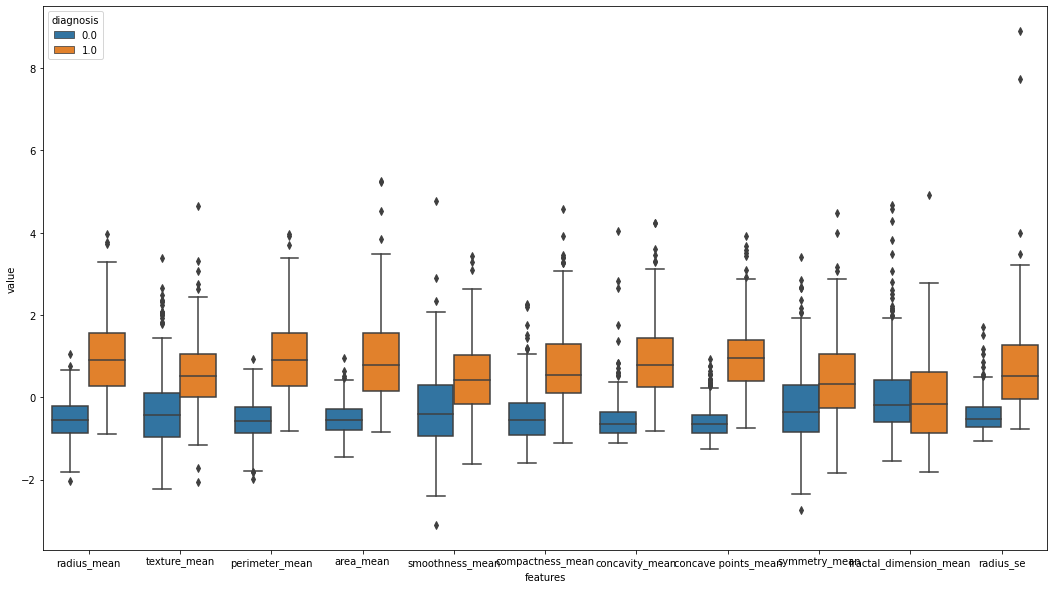

In [65]:
data_x = pd.concat([y,data_norm.iloc[:,0:11]],axis=1)
data = pd.melt(data_x, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')


plt.figure(figsize = (18, 10))
sns.boxplot(x ='features', y = 'value', hue = 'diagnosis', data = data);

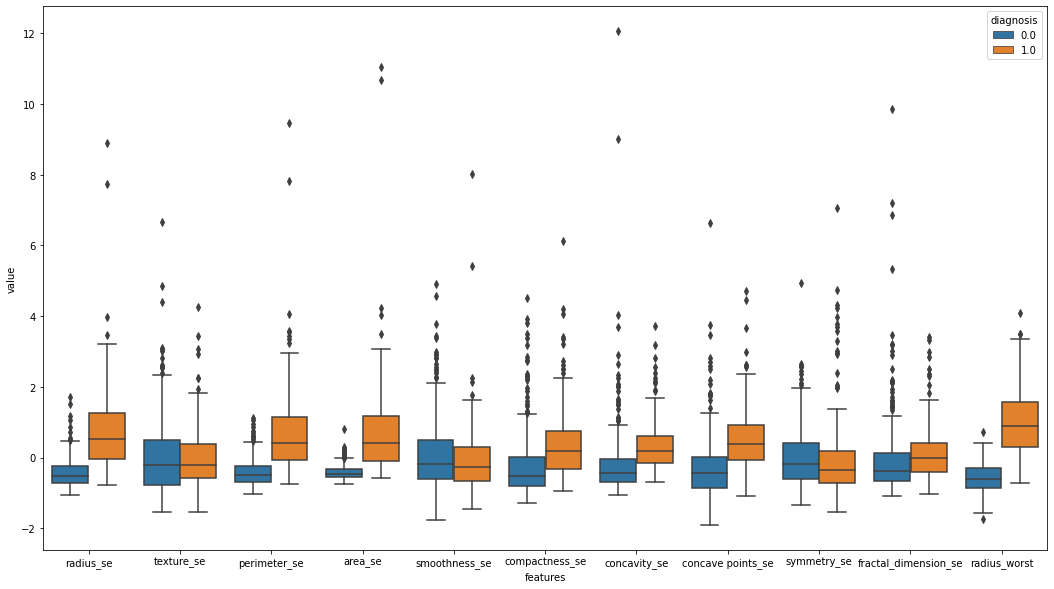

In [66]:
data_x = pd.concat([y,data_norm.iloc[:,10:21]],axis=1)
data = pd.melt(data_x, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')


plt.figure(figsize = (18, 10))
sns.boxplot(x ='features', y = 'value', hue = 'diagnosis', data = data);

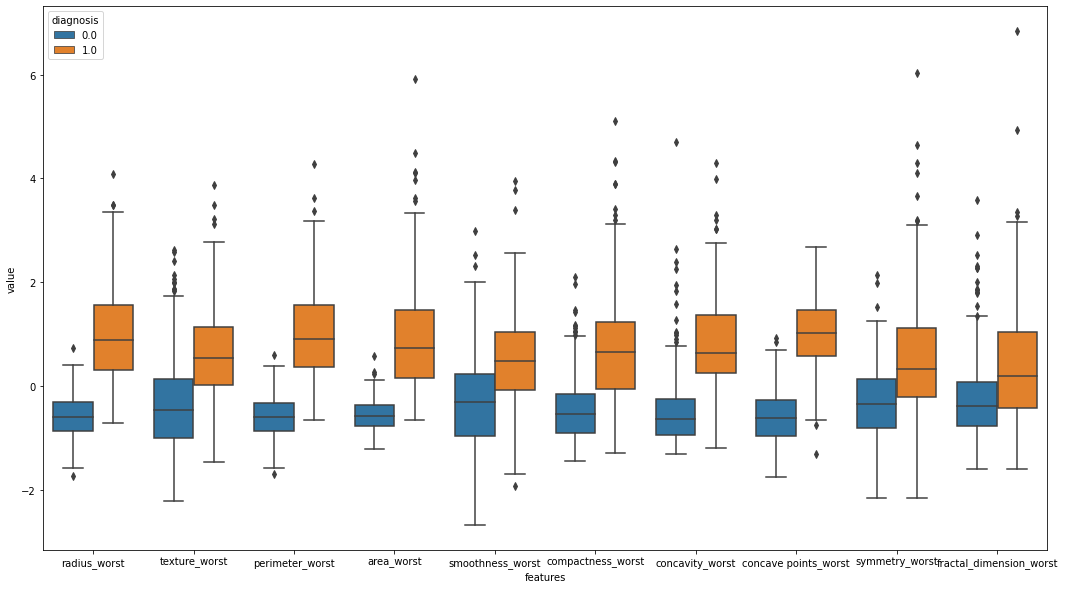

In [67]:
data_x = pd.concat([y,data_norm.iloc[:,20:31]],axis=1)
data = pd.melt(data_x, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')


plt.figure(figsize = (18, 10))
sns.boxplot(x ='features', y = 'value', hue = 'diagnosis', data = data);

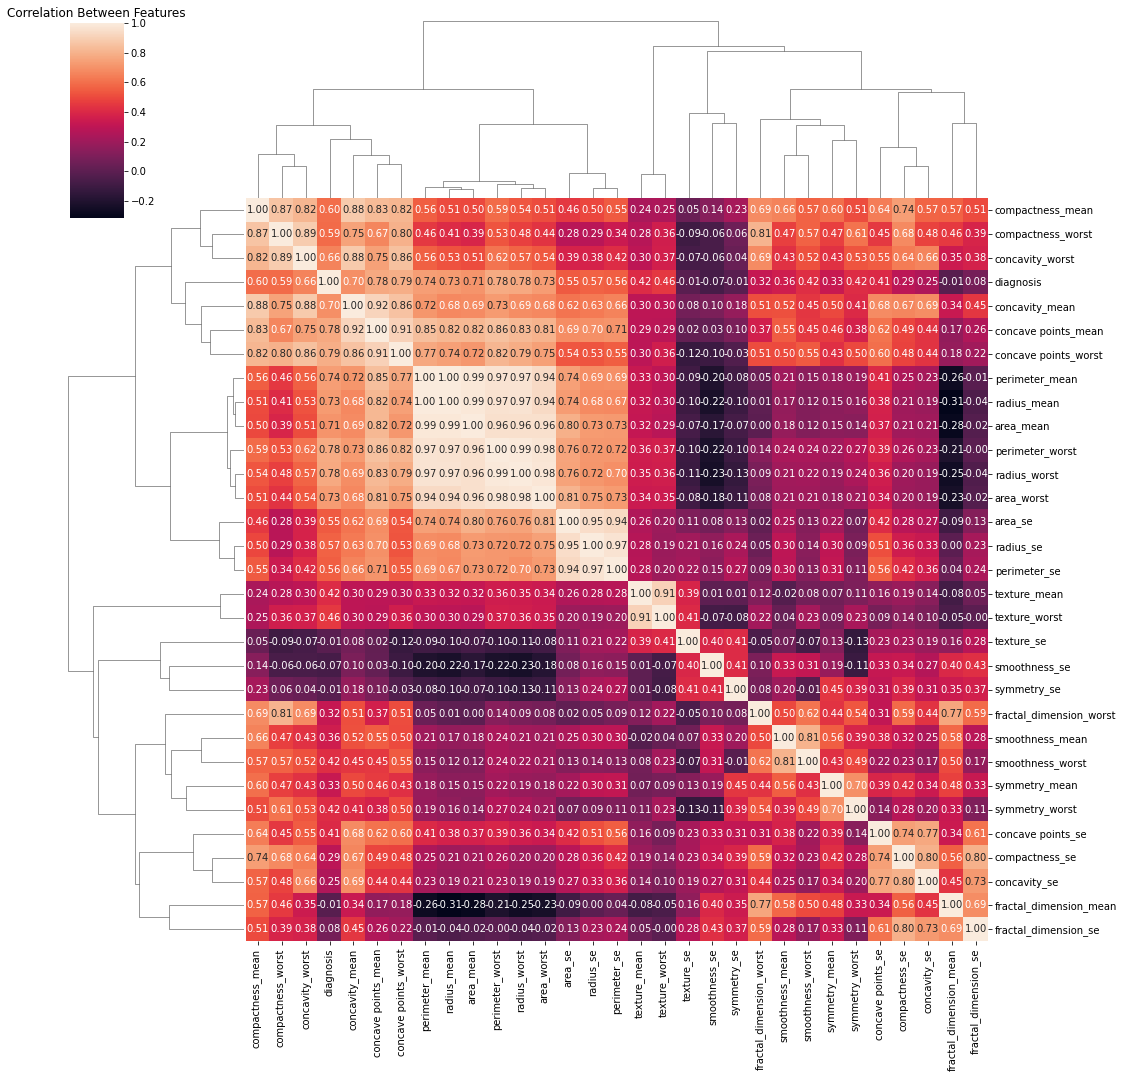

In [68]:
#fig = plt.figure(figsize = (15,15 ))
# Plotting the Feature Correlations 
correl_1 = df.corr()
sns.clustermap(correl_1, annot = True, fmt = '.2f', figsize = (15, 15))
plt.title("Correlation Between Features")
plt.show()

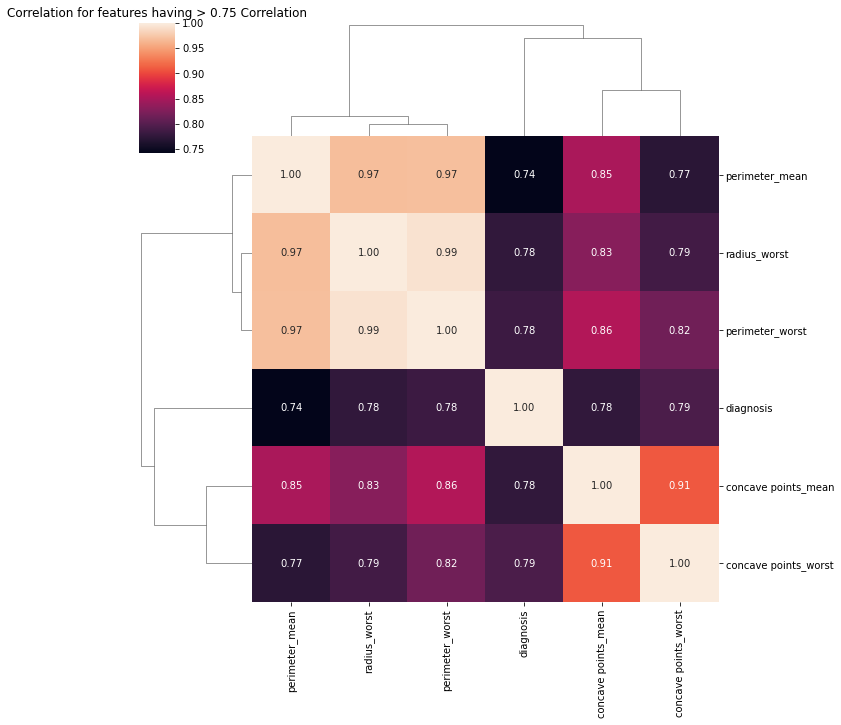

In [70]:
# Plotting the features with high correlation for visibility!
thold = 0.74
filt = np.abs(correl_1['diagnosis'])>thold
corrr_feats = correl_1.columns[filt].tolist()
sns.clustermap(df[corrr_feats].corr() , annot = True, fmt ='.2f')
plt.title("Correlation for features having > 0.75 Correlation")
plt.show()

In [71]:
# Dropping one of the two columns with high correlation
# the code below will only keep one of the two columns having high correlation
correl = x.corr()
all_cols = np.full((correl.shape[0], ), True, dtype = bool)
for i in range(correl.shape[0]):
    for j in range(i+1, correl.shape[0]):
        if correl.iloc[i, j] >= 0.85:
            if all_cols[j]:
                all_cols[j] = False

sel_cols = x.columns[all_cols]
x_1 =  x[sel_cols]

In [72]:
x_1.head()
x_1.shape

(569, 17)

In [73]:
# Selecting features based on p-values
import statsmodels.api as sm

def p_v_eliminate(x, y, sl, cols):
    var_n = len(x.columns)
    
    for i in range(0, var_n):
        reg_OLS = sm.OLS(y, x).fit()
        
        maxVar = float(max(reg_OLS.pvalues))
        #print(reg_OLS.pvalues)
        if maxVar> sl:
            for j in range(0 , var_n - i):
                if (reg_OLS.pvalues[j].astype(float) == maxVar):
                    x = x.drop(x.columns[j],axis =  1)
                    cols = np.delete(cols, j)
                    
    reg_OLS.summary()
    return x, cols


In [74]:
sel_thold = 0.05 #Threshold for p-value. (P Value must be less than 0.05 for two features to be both kept)
x_1.shape
data_sel , sel_colx = p_v_eliminate(x_1, y, sel_thold, sel_cols)

In [89]:
# Final Features to be used:
print("We'll be using the following {} features:".format(len(sel_colx)))
for i in sel_colx:
    print(i)
    


We'll be using the following 10 features:
radius_mean
texture_mean
compactness_mean
fractal_dimension_mean
radius_se
compactness_se
concave points_se
smoothness_worst
symmetry_worst
fractal_dimension_worst


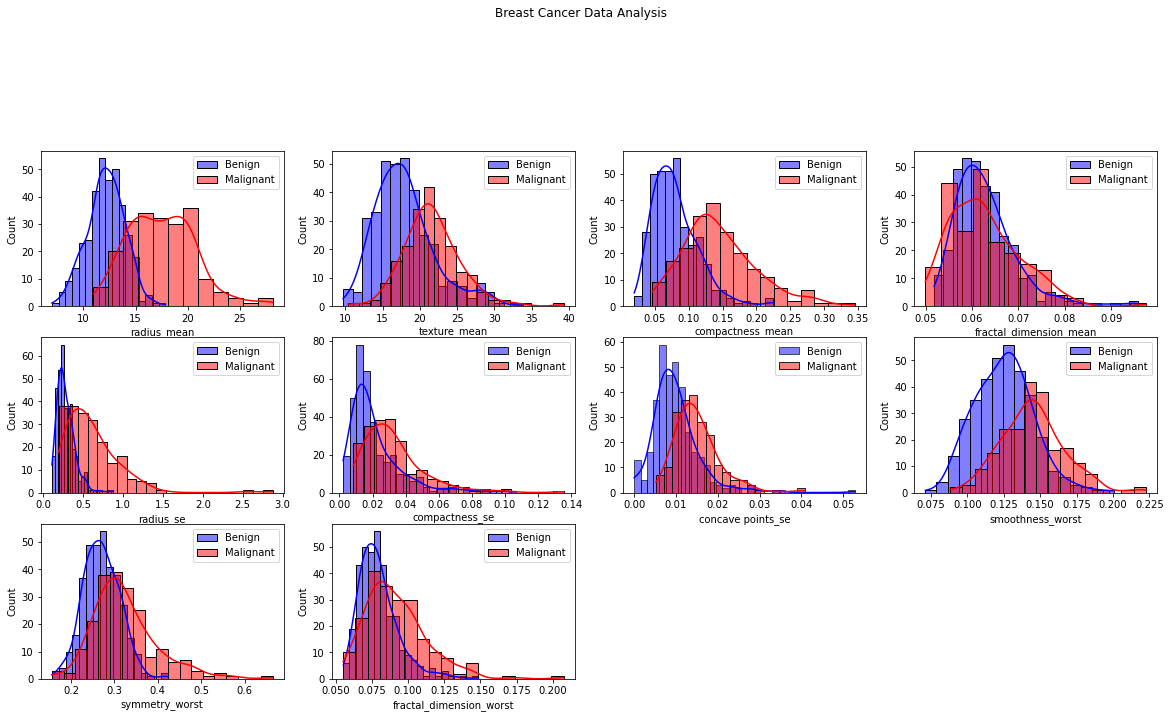

In [90]:
# Visualizing the selected 10 features

fig =plt.figure(figsize= (20, 20) )
j = 0

for i in data_sel.columns:
    plt.subplot(6, 4, j + 1)
    j+=1
    sns.histplot(data_sel[i][y==0] ,color = 'b' , label = 'Benign' ,kde= True)
    
    sns.histplot(data_sel[i][y==1], color = 'r' , label = 'Malignant',kde= True)
    plt.legend(loc = 'best')
    
fig.suptitle('Breast Cancer Data Analysis')

#fig.tight_layout()
plt.show()

# Splitting Data into Train & Test sets

In [91]:
x_tr , x_tst, y_tr, y_tst = train_test_split(data_sel.values, y.values , test_size = 0.3 , random_state =29)

In [92]:
# Now that we've splitted the data into training and test sets, we'll normalize the data, first on the training set, and apply the same normalization on the test set as well.

# Data Standardization

scaler = StandardScaler()
#Fitting on the training set
scaler.fit_transform(x_tr)
X_tr = scaler.transform(x_tr)
X_tst = scaler.transform(x_tst)

# SVM

In [94]:
#First, let's test how an SVM Classifier does on the data!
svc = SVC()
svc_1 = SVC()
svc.fit(x_tr, y_tr)
svc_1.fit(X_tr, y_tr)

SVC()

In [95]:
predicts = svc.predict(x_tst)
predicts_1 = svc_1.predict(X_tst)

In [97]:
#Confusion Matrix:
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

cm = confusion_matrix(y_tst, predicts)
acc = accuracy_score(y_tst, predicts)
print("Accuracy for the SVM Model without Data Standardization is: ", acc)

cm_1 = confusion_matrix(y_tst, predicts_1)
acc_1 = accuracy_score(y_tst, predicts_1)
print("Accuracy for the SVM Model with Data Standardization is: ", acc_1)
# Just wanted to compare the two results to see how much of an effect can standardization have on the final accuracy!

Accuracy for the SVM Model without Data Standardization is:  0.9064327485380117
Accuracy for the SVM Model with Data Standardization is:  0.9766081871345029


Accuracy for SVM is:  0.9766081871345029


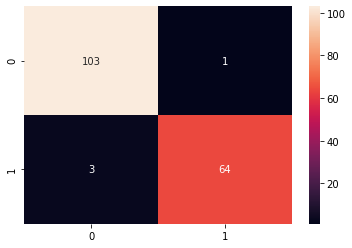

In [101]:
print("Accuracy for SVM is: ", acc_1)
sns.heatmap(cm_1, annot = True, fmt ='d')
plt.show()

In [107]:
# So 64 out of 67 Malignant cases in the Test Set were correctly predicted by the Classifier, and there's only one false positive.

# KNN

Accuracy for KNN with 3 neighbors is:  0.9590643274853801


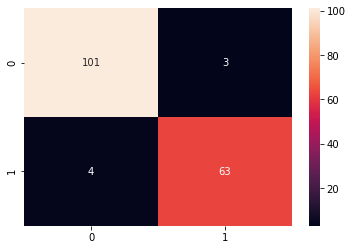

In [108]:
# Testing out KNN with 3 neighbors 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_tr, y_tr)
pred_knn = knn.predict(X_tst)
cm_knn = confusion_matrix(y_tst, pred_knn)
acc_knn = accuracy_score(y_tst, pred_knn)

print("Accuracy for KNN with 3 neighbors is: ", acc_knn)
sns.heatmap(cm_knn, annot = True, fmt ='d')
plt.show()

# Random Forest Classification

Accuracy for Random Forest Classifier is:  0.9532163742690059


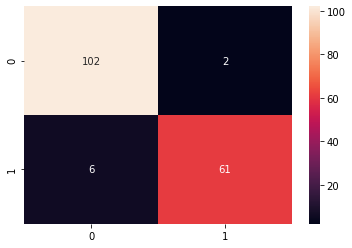

In [110]:
from sklearn.ensemble import RandomForestClassifier

rd_frst = RandomForestClassifier(random_state= 11)
rd_frst = rd_frst.fit(X_tr, y_tr)
acc_rf = accuracy_score(y_tst, rd_frst.predict(X_tst))
print("Accuracy for Random Forest Classifier is: ", acc_rf)
cm_rf = confusion_matrix(y_tst, rd_frst.predict(X_tst))
sns.heatmap(cm_rf, annot = True, fmt ='d')
plt.show()

# Principal Component Analysis

In [111]:
from sklearn.decomposition import PCA

pca = PCA(0.90)

#Fitting PCA on the Training Set
pca.fit(X_tr)

#Applying the Mapping to the train & test set
pca_tr = pca.transform(X_tr)
pca_tst= pca.transform(X_tst)

In [112]:
#The PCA has 5 dimensions. 
# Now, we'll apply SVM Again

svm = SVC()

svm.fit(pca_tr, y_tr)
predicts = svm.predict(pca_tst)

cm = confusion_matrix(y_tst, predicts)
acc = accuracy_score(y_tst, predicts)
print("Accuracy for the SVM Model without Data Standardization is: ", acc)

Accuracy for the SVM Model without Data Standardization is:  0.9766081871345029


# PCA For Visuzalization

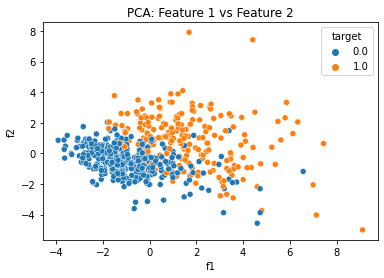

In [113]:
x_scaled = scaler.fit_transform(data_sel)

pca_1 = PCA(n_components =2 )
#Fitting PCA 
pca_1.fit(x_scaled)

#Applying the Mapping to the train & test set
x_red = pca_1.transform(x_scaled)

pca_df = pd.DataFrame(x_red, columns = ['f1', 'f2'])
pca_df['target'] = y

sns.scatterplot(x = 'f1', y = 'f2', hue ='target', data = pca_df)
plt.title("PCA: Feature 1 vs Feature 2")
plt.show()

In [114]:
#That's it. I'd also try neural networks for this dataset, just for the sake of it, and not because the accuracy is not good enough!